## GESTION HOSPITALARIA

## Instituto de Estadística de la Comunidad de Madrid.

### Datos de 2010-2014

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 15,10 

In [475]:
def toFloat(dataFrame):
    
    for i in dataFrame.columns:
        if dataFrame[i].dtypes != 'float64' and dataFrame[i].dtypes != 'int64':
            dataFrame[i] = dataFrame[i].apply(lambda x: x.replace('.','')).astype(float)

    return dataFrame

## 1.Camas en funcionamiento por Dependencia funcional según Especialidad

In [476]:
camas_df = pd.read_csv('Datasets/camas/camas.csv', sep=';', decimal=',')
camas_df = toFloat(camas_df)
camas_df = camas_df.set_index('Año')
camas_df.head()

,Total año,Especialidades Médicas,Especialidades Quirúrgicas,Traumatología y Ortopedia,Obstetricia y Ginecología,Pediatría,Medicina y Cirugía Pediátricas,Neonatología,Intensivos Neonatales,Rehabilitación,Medicina Intensiva,U.C.I,Unidad Coronarios,Unidad Quemados,Larga Estancia,Psiquiatría,Unidad de Agudos,Unidad Larga Estancia,Otras
Año,,,,,,,,,,,,,,,,,,,
2010,12029.0,2805.0,1649.0,630.0,464,775,582,136,57,21,366,267,89,10,0,484,289,195,187
2011,11856.0,3935.0,2575.0,1051.0,867,989,687,203,99,280,597,485,102,10,217,853,383,470,492
2012,11545.0,3802.0,2463.0,1058.0,825,929,641,190,98,302,588,481,97,10,241,847,380,467,490
2013,11265.0,3692.0,2423.0,1031.0,786,916,631,185,100,287,569,481,78,10,206,913,392,521,442
2014,11130.0,3712.0,2319.0,941.0,782,938,642,189,107,297,560,447,103,10,283,990,444,546,308


In [477]:
red_camas_df = camas_df.drop(['Neonatología','Pediatría','Medicina y Cirugía Pediátricas','Traumatología y Ortopedia','Medicina Intensiva','U.C.I','Unidad de Agudos', 'Obstetricia y Ginecología','Intensivos Neonatales', 'Unidad Quemados','Otras'], axis=1)
red_camas_df.head()

,Total año,Especialidades Médicas,Especialidades Quirúrgicas,Rehabilitación,Unidad Coronarios,Larga Estancia,Psiquiatría,Unidad Larga Estancia
Año,,,,,,,,
2010,12029.0,2805.0,1649.0,21,89,0,484,195
2011,11856.0,3935.0,2575.0,280,102,217,853,470
2012,11545.0,3802.0,2463.0,302,97,241,847,467
2013,11265.0,3692.0,2423.0,287,78,206,913,521
2014,11130.0,3712.0,2319.0,297,103,283,990,546


In [478]:
red_camas_df.to_csv('camas.csv', sep = ';')

In [479]:
big_red_camas_df = red_camas_df.loc[:,red_camas_df.mean() >5000]
medium_red_camas_df = red_camas_df.loc[:,(red_camas_df.mean() < 5000) &  (red_camas_df.mean() > 1000)]
small_red_camas_df = red_camas_df.loc[:,(red_camas_df.mean() < 1000) &  (red_camas_df.mean() > 200)]
tiny_red_camas_small_df = red_camas_df.loc[:,red_camas_df.mean() <200]

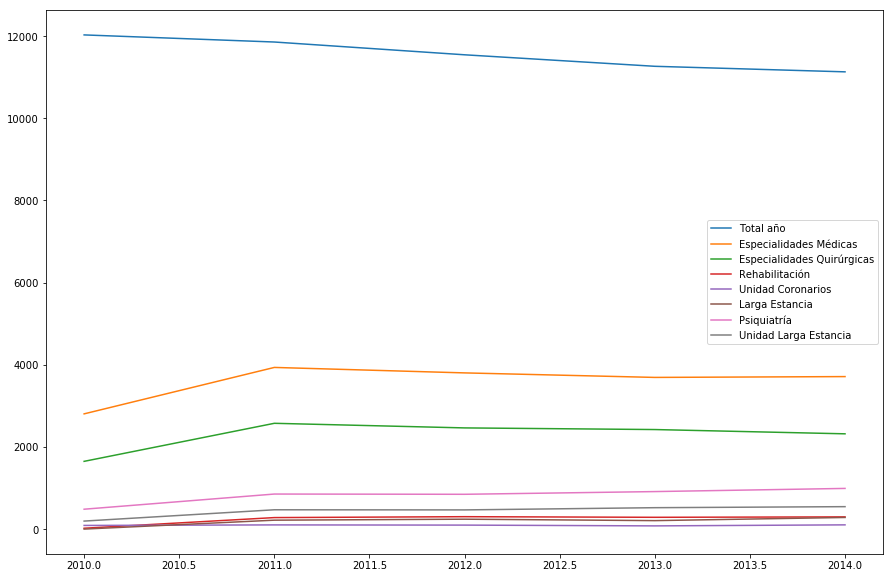

In [503]:
plt.plot(red_camas_df)
plt.legend(red_camas_df.columns)

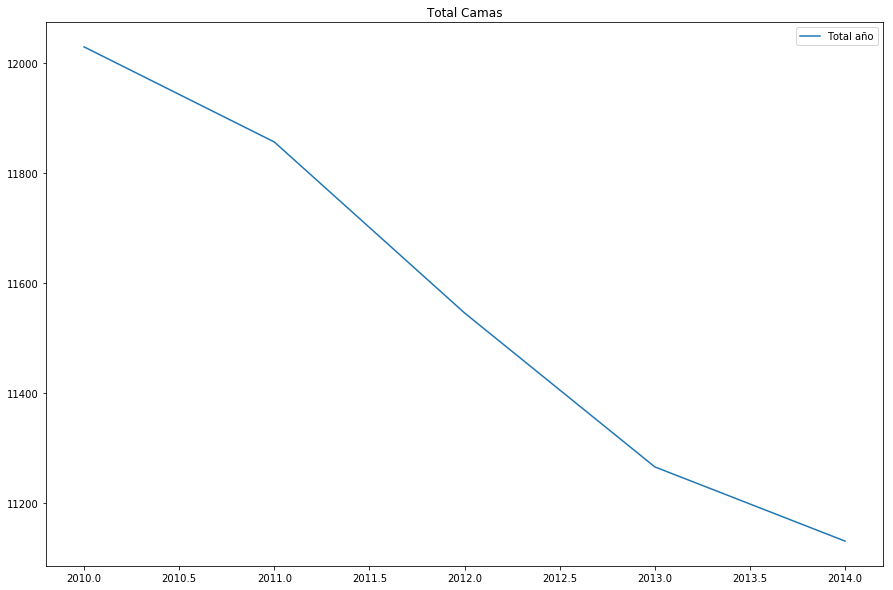

In [505]:
plt.plot(big_red_camas_df)
plt.legend(big_red_camas_df.columns)
plt.title('Total Camas')

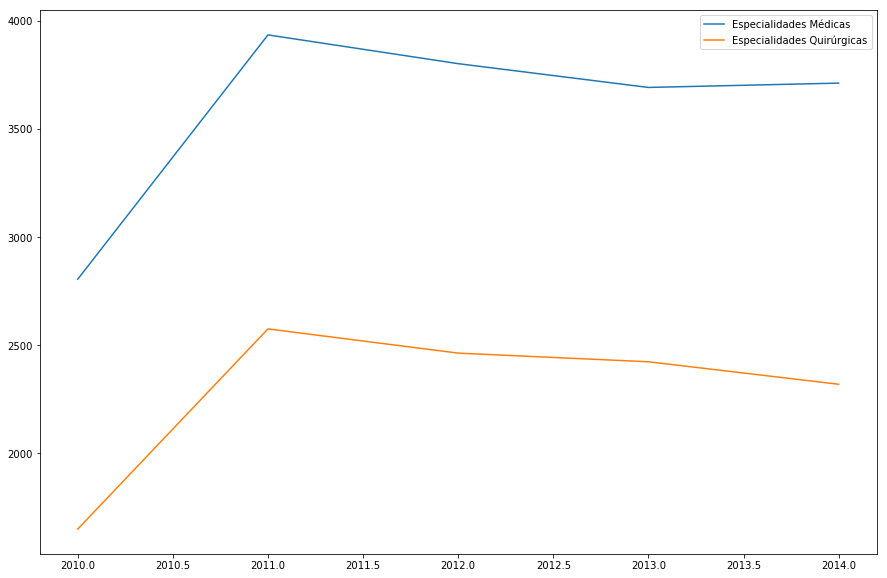

In [481]:
plt.plot(medium_red_camas_df)
plt.legend(medium_red_camas_df.columns)

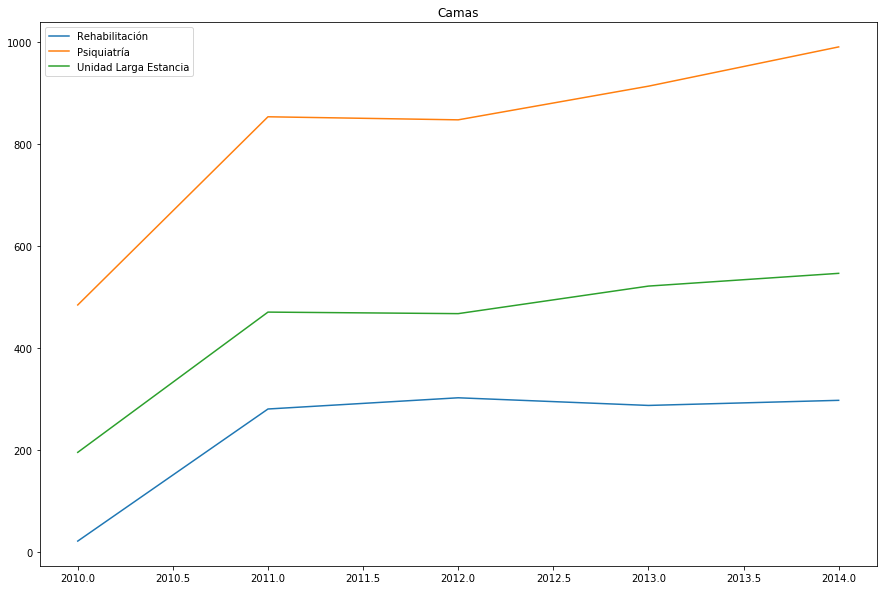

In [510]:
plt.plot(small_red_camas_df)
plt.legend(small_red_camas_df.columns)
plt.title('Camas')

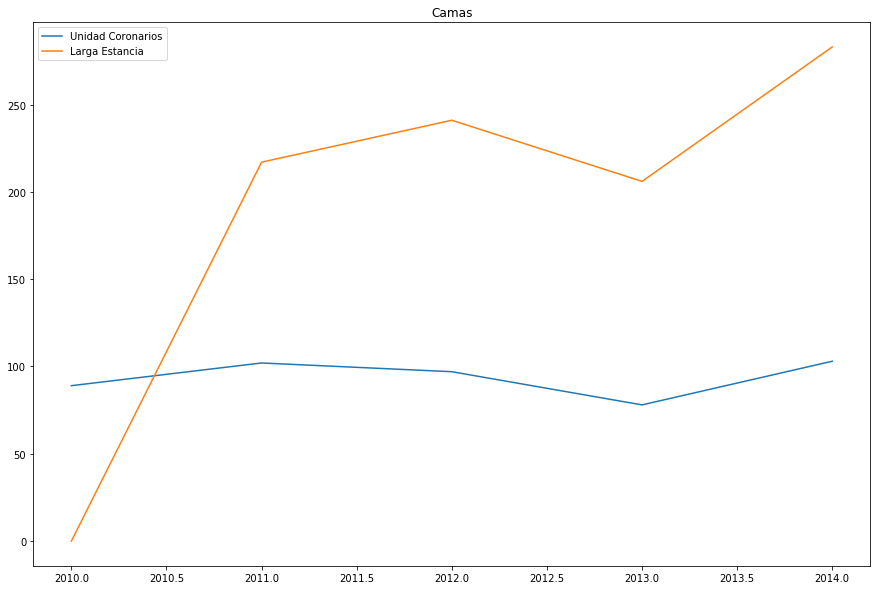

In [511]:
plt.plot(tiny_red_camas_small_df)
plt.legend(tiny_red_camas_small_df.columns)
plt.title('Camas')

## 2.Estancias por Dependencia Funcional de los hospitales según Especialidad


In [484]:
estancias_df = pd.read_csv('Datasets/camas/estancias.csv', sep=';',decimal=',')
estancias_df = toFloat(estancias_df)
estancias_df = estancias_df.set_index('Año')
estancias_df.head()

,TOTAL,Especialidades Médicas,Especialidades Quirúrgicas,Traumatología y Ortopedia,Obstetricia y Ginecología,Pediatría,Medicina y Cirugía Pediátricas,Neonatología,Intensivos Neonatales,Rehabilitación,Medicina Intensiva,U.C.I.,Unidad Coronarios,Unidad Quemados,Larga Estancia,Psiquiatría,Unidad de Agudos,Unidad Larga Estancia,Otras
Año,,,,,,,,,,,,,,,,,,,
2010,3435459.0,1296352.0,671167.0,283413.0,232015.0,239647.0,159398.0,52416.0,27833.0,103972.0,135728.0,102413.0,30735.0,2580.0,56169.0,263310.0,126040.0,137270.0,153686.0
2011,3365907.0,1270521.0,649361.0,268885.0,221248.0,240785.0,160408.0,53828.0,26549.0,92055.0,140536.0,114723.0,23627.0,2186.0,77252.0,258868.0,113520.0,145348.0,146396.0
2012,3277318.0,1240473.0,617674.0,259048.0,202325.0,232692.0,151977.0,52520.0,28195.0,95082.0,135539.0,110773.0,22536.0,2230.0,74292.0,270736.0,118431.0,152305.0,149457.0
2013,3208643.0,1242142.0,595779.0,247829.0,182160.0,226936.0,149952.0,51052.0,25932.0,91886.0,132180.0,111800.0,18334.0,2046.0,63316.0,292429.0,121763.0,170666.0,133986.0
2014,3177020.0,1232604.0,577584.0,236431.0,174864.0,229441.0,150028.0,52012.0,27401.0,98335.0,131880.0,105634.0,23842.0,2404.0,91653.0,312964.0,135269.0,177695.0,91264.0


In [485]:
red_estancias_df = estancias_df.drop(['Neonatología','Pediatría','Medicina y Cirugía Pediátricas','Traumatología y Ortopedia','Medicina Intensiva','U.C.I.','Unidad de Agudos', 'Obstetricia y Ginecología','Intensivos Neonatales', 'Unidad Quemados','Otras'], axis=1)
red_estancias_df.head()

,TOTAL,Especialidades Médicas,Especialidades Quirúrgicas,Rehabilitación,Unidad Coronarios,Larga Estancia,Psiquiatría,Unidad Larga Estancia
Año,,,,,,,,
2010,3435459.0,1296352.0,671167.0,103972.0,30735.0,56169.0,263310.0,137270.0
2011,3365907.0,1270521.0,649361.0,92055.0,23627.0,77252.0,258868.0,145348.0
2012,3277318.0,1240473.0,617674.0,95082.0,22536.0,74292.0,270736.0,152305.0
2013,3208643.0,1242142.0,595779.0,91886.0,18334.0,63316.0,292429.0,170666.0
2014,3177020.0,1232604.0,577584.0,98335.0,23842.0,91653.0,312964.0,177695.0


In [486]:
red_estancias_df.to_csv('estancias.csv', sep = ';')

In [487]:
big_red_estancias_df = red_estancias_df.loc[:,red_estancias_df.mean() >2000000]
medium_red_estancias_df = red_estancias_df.loc[:,(red_estancias_df.mean() < 1500000) &  (red_estancias_df.mean() > 600000)]
small_red_estancias_df = red_estancias_df.loc[:,red_estancias_df.mean() < 600000]

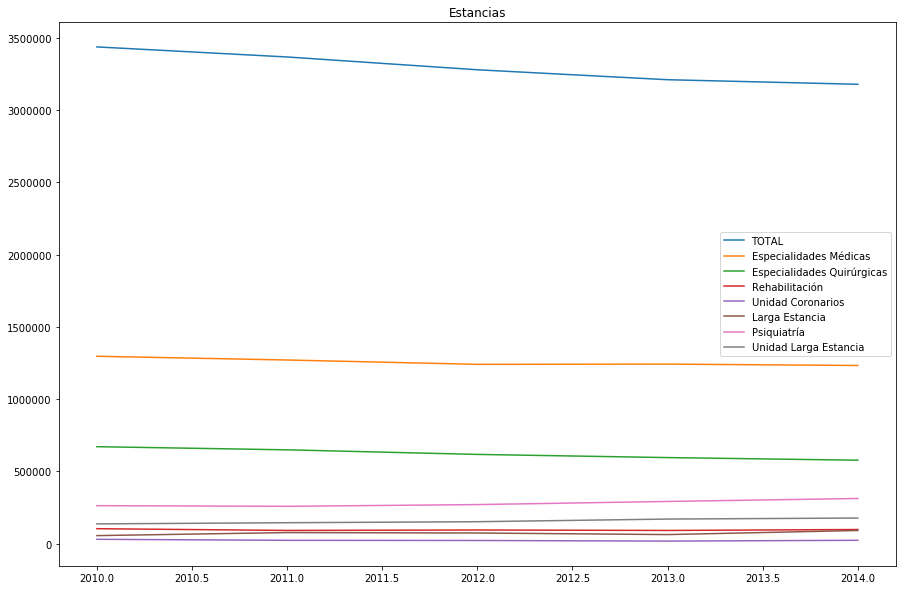

In [512]:
plt.plot(red_estancias_df)
plt.legend(red_estancias_df.columns)
plt.title('Estancias')

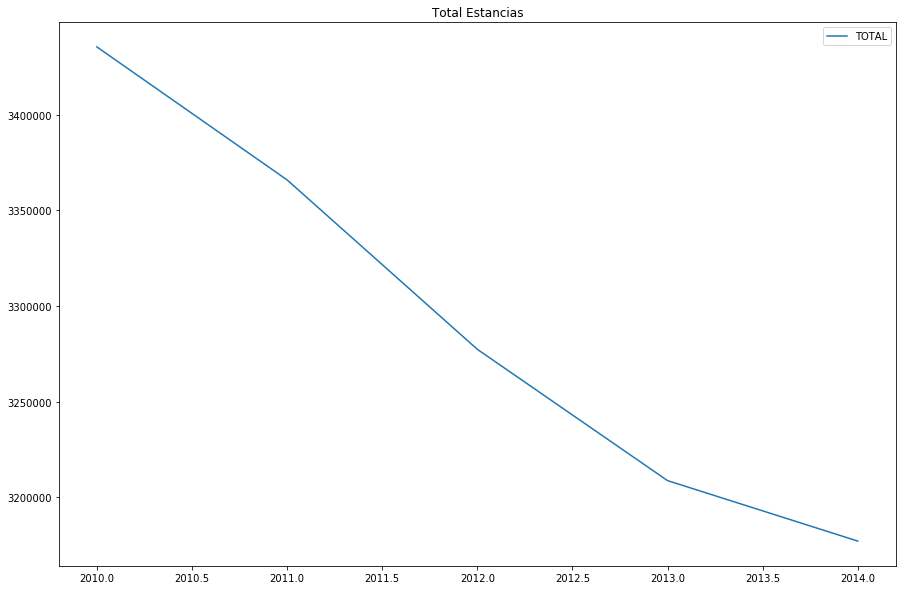

In [513]:
plt.plot(big_red_estancias_df)
plt.legend(big_red_estancias_df.columns)
plt.title('Total Estancias')

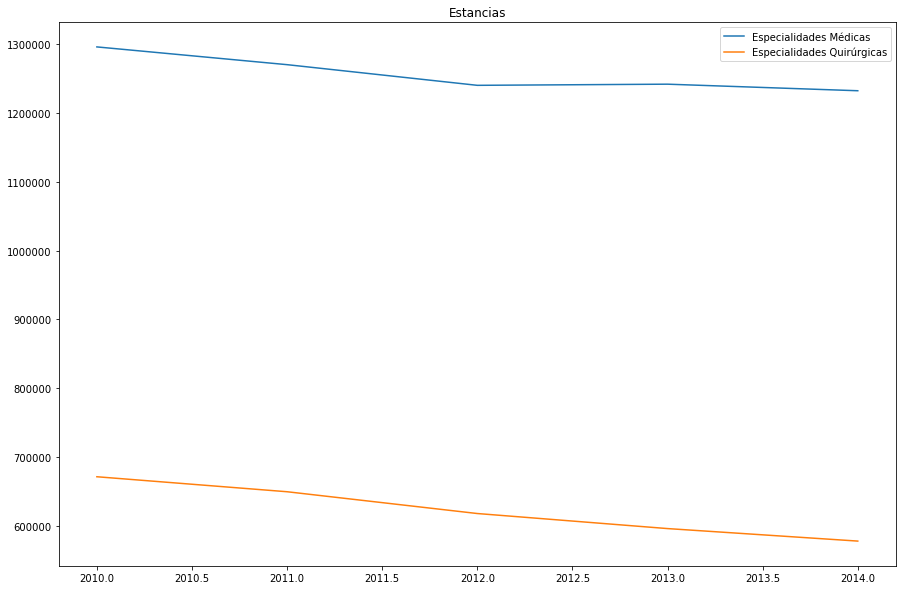

In [514]:
plt.plot(medium_red_estancias_df)
plt.legend(medium_red_estancias_df.columns)
plt.title('Estancias')

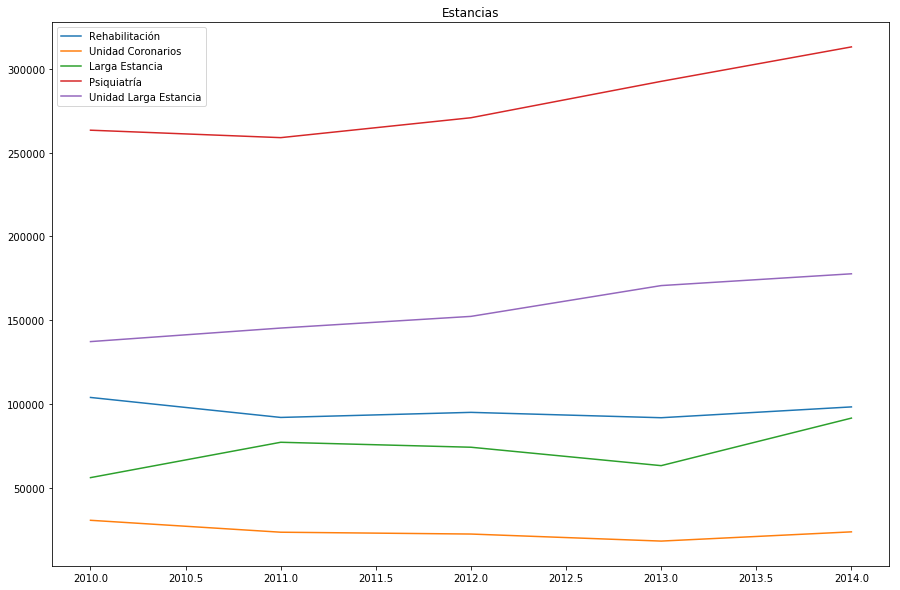

In [515]:
plt.plot(small_red_estancias_df)
plt.legend(small_red_estancias_df.columns)
plt.title('Estancias')

## 3.Distribución de altas por Especialidades según Dependencia Funcional

In [492]:
altas_df = pd.read_csv('Datasets/camas/altas.csv', sep=';',decimal=',')
altas_df = toFloat(altas_df)
altas_df = altas_df.set_index('Año')
altas_df.head()


,Total año,Total Médicas,Total Quirúrgicas,Total Traumatología y Ortopedia,Total Obstetricia y Ginecología,Total Pediatría,Pediatria Cirugía,Pediatría Neonatología,Pediatria Intensivos,Total Rehabilitación,Total Medicina Intensiva,Medicina Intensiva U.C.I,Medicina Intensiva Unidad Coronarios,Medicina Intensiva Unidad Quemados,Total Larga estancia,Total Psiquiatría,Psiquiatría Agudos,Psiquiatría Larga estancia,Total Otras
Año,,,,,,,,,,,,,,,,,,,
2010,480058.0,148834.0,138992.0,54917.0,74829.0,41583.0,33849.0,6122.0,1612.0,1829.0,5485.0,3500.0,1802.0,183,145,7863.0,6982.0,881.0,5581.0
2011,480058.0,148834.0,138992.0,54917.0,74829.0,41583.0,33849.0,6122.0,1612.0,1829.0,5485.0,3500.0,1802.0,183,145,7863.0,6982.0,881.0,5581.0
2012,479755.0,156733.0,139249.0,53270.0,68598.0,39239.0,32155.0,6122.0,962.0,2099.0,6522.0,4491.0,1832.0,199,681,8367.0,6990.0,1377.0,4997.0
2013,475924.0,157578.0,135409.0,54381.0,65744.0,39335.0,32375.0,6055.0,905.0,2051.0,7055.0,5181.0,1708.0,166,621,8888.0,7260.0,1628.0,4862.0


In [493]:
red_altas_df = altas_df.drop(['Total Traumatología y Ortopedia','Total Pediatría','Total Obstetricia y Ginecología','Pediatría Neonatología','Psiquiatría Agudos','Pediatria Intensivos','Medicina Intensiva U.C.I','Pediatria Cirugía','Total Rehabilitación','Medicina Intensiva Unidad Quemados','Total Otras'], axis=1)
red_altas_df.head()

,Total año,Total Médicas,Total Quirúrgicas,Total Medicina Intensiva,Medicina Intensiva Unidad Coronarios,Total Larga estancia,Total Psiquiatría,Psiquiatría Larga estancia
Año,,,,,,,,
2010,480058.0,148834.0,138992.0,5485.0,1802.0,145,7863.0,881.0
2011,480058.0,148834.0,138992.0,5485.0,1802.0,145,7863.0,881.0
2012,479755.0,156733.0,139249.0,6522.0,1832.0,681,8367.0,1377.0
2013,475924.0,157578.0,135409.0,7055.0,1708.0,621,8888.0,1628.0


In [496]:
red_altas_df.to_csv('altas.csv', sep = ';')

In [497]:
big_red_altas_df = red_altas_df.loc[:,red_altas_df.mean() >400000]
medium_red_altas_df = red_altas_df.loc[:,(red_altas_df.mean() < 200000) &  (red_altas_df.mean() > 60000)]
small_red_altas_df = red_altas_df.loc[:,(red_altas_df.mean() < 60000) &  (red_altas_df.mean() > 1000)]
tiny_red_altas_df = red_altas_df.loc[:,red_altas_df.mean() <1000]

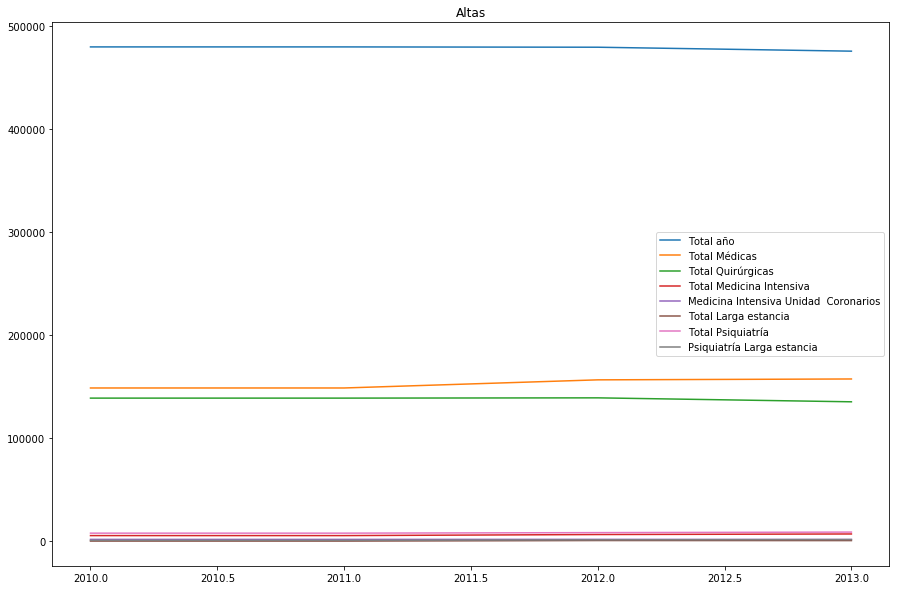

In [507]:
plt.plot(red_altas_df)
plt.legend(red_altas_df.columns)
plt.title('Altas')

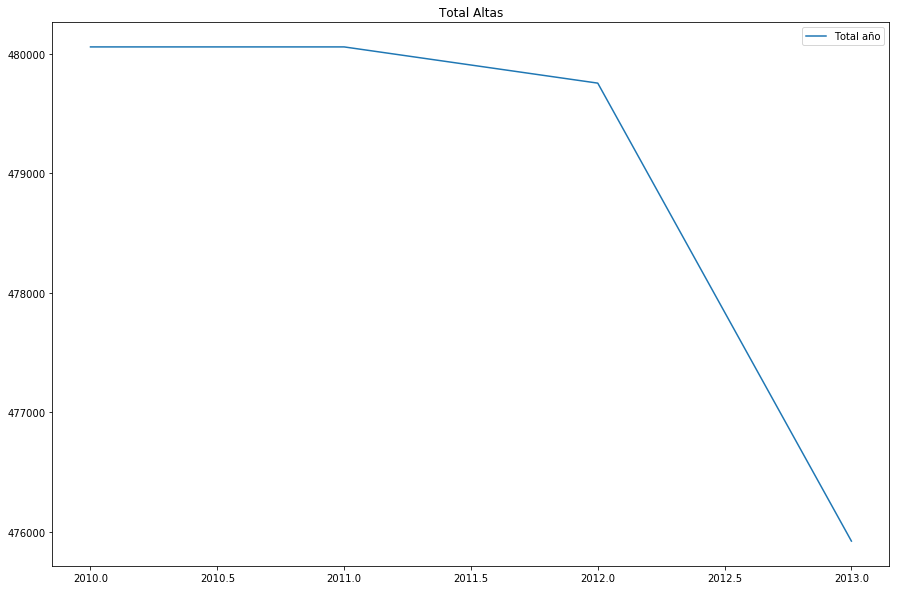

In [508]:
plt.plot(big_red_altas_df)
plt.legend(big_red_altas_df.columns)
plt.title('Total Altas')

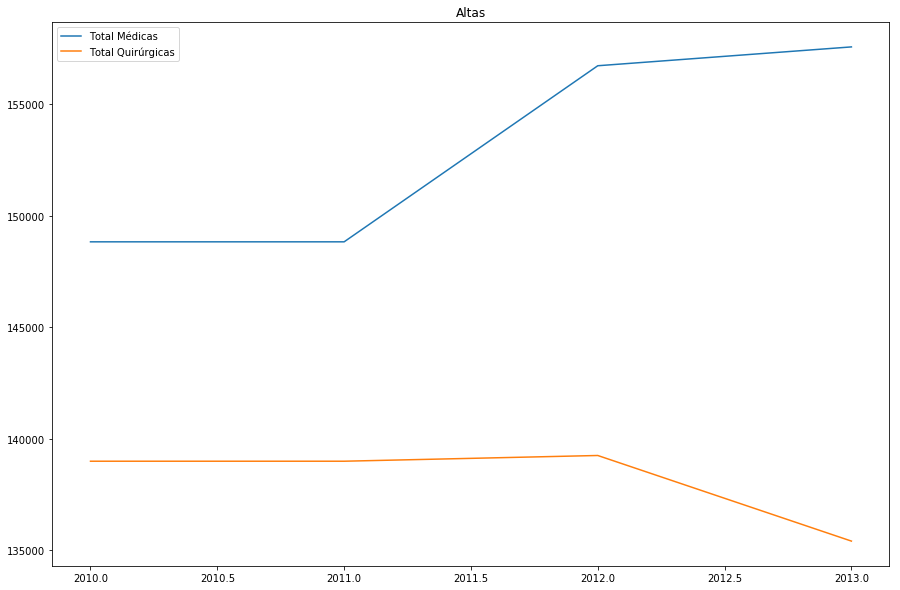

In [516]:
plt.plot(medium_red_altas_df)
plt.legend(medium_red_altas_df.columns)
plt.title('Altas')

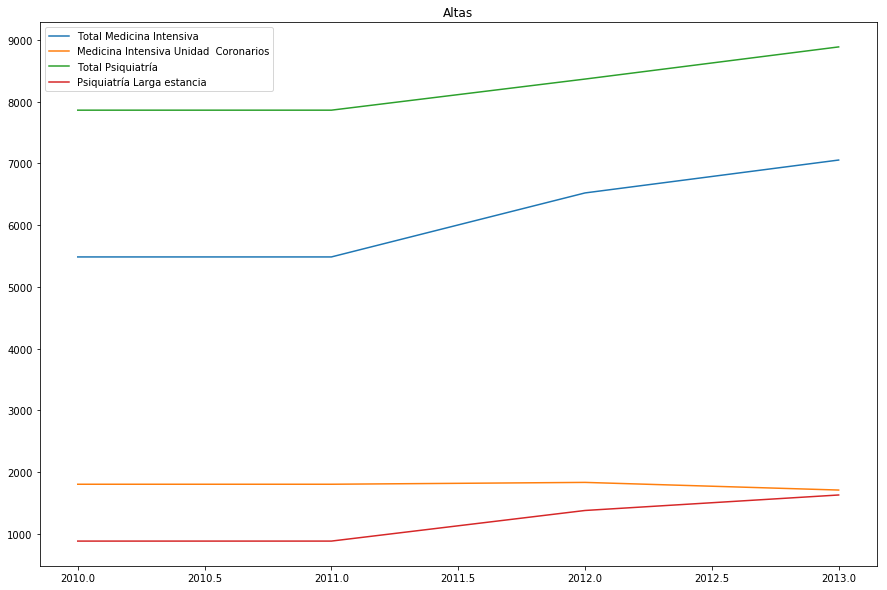

In [517]:
plt.plot(small_red_altas_df)
plt.legend(small_red_altas_df.columns)
plt.title('Altas')

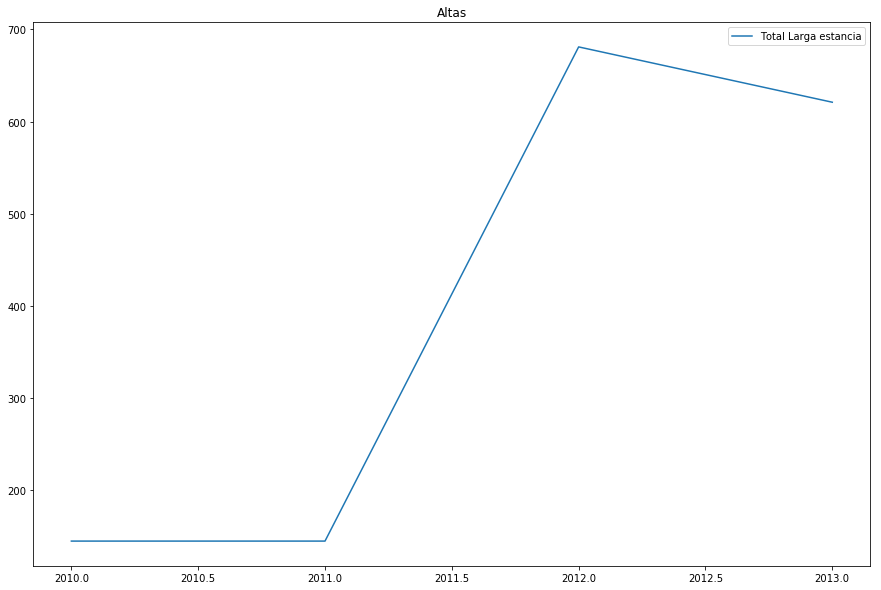

In [509]:
plt.plot(tiny_red_altas_df)
plt.legend(tiny_red_altas_df.columns)
plt.title('Altas')